### Import the libraries

In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import trim_mean
import geopandas as gpd
%matplotlib inline

### Read the dataset

In [2]:
data=pd.read_csv('datasets_12603_17232_Life Expectancy Data1.csv')

|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing status|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 1-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|Human Development Index in terms of income composition of resources (index ranging from 0 to 1)|
|Schooling|Number of years of Schooling(years)|

### Getting to know the data

In [3]:
data.head(n=5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


As it data describes, the average life expectency is only <strong>69.2 years</strong> in the whole world. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

It looks like our data has nearly 3000 entries with 22 feature columns (20 Quantitative and 2 Qualitative). Inequality in the the number of entries indicates Null values which needs to be fixed. 

### Data Cleaning

Let's see where we have these Null values so we can either replace them or eradicate them. 

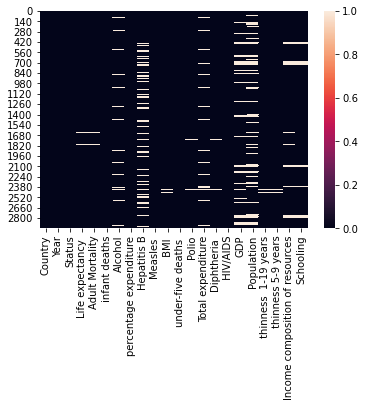

In [6]:
#plotting the Null values
sns.heatmap(pd.isnull(data))
plt.show()

It looks like we need more information about the Null entries. Let's count them.

In [7]:
#Counting the Null values in each column
columns = list(data.columns)
nulls = []

for column in columns:
    nulls.append(data[column].isnull().sum())

nullValues = pd.DataFrame({'Columns':columns,'Null values':nulls})
nullValues

,Columns,Null values
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,10
4,Adult Mortality,10
5,infant deaths,0
6,Alcohol,194
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


There are no Null values in our qualitative feature columns. For the columns that have less than 50 null values (e.g. Life expectancy, Adult Mortality), we will use the trimmed mean value to fill them up. But first let's make a copy of our data, so our original data remians intact.

In [8]:
#make a copy of data
df = data.copy()

In [9]:
#filling up the Null values with average
Few_Nulls = ['Life expectancy ', 'Adult Mortality', ' BMI ', 'Polio', 'Diphtheria ', 
             ' thinness  1-19 years', ' thinness 5-9 years']

for column in Few_Nulls:
    df[column]=df[column].fillna(value=trim_mean(df[column],0.1))

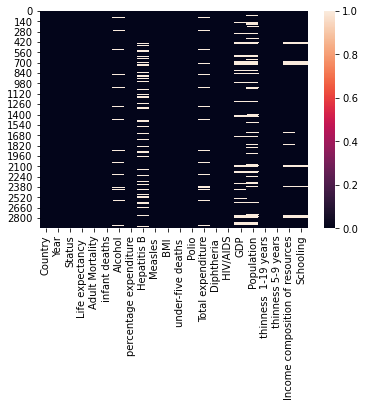

In [10]:
#plotting the remaining Null values
sns.heatmap(pd.isnull(df))
plt.show()

It worked! we filled up the columns with few null values. The next step is filling the remining columns one by one. However, before that, we need to fix the columns titles and remove unnecessary spaces. 

In [11]:
#removing the unnecessary sapces
df.rename(columns = {'Life expectancy ':'Life expectancy', ' BMI ': 'BMI', 
                           ' thinness  1-19 years': 'thinness  1-19 years', 
                           ' thinness 5-9 years': 'thinness 5-9 years',
                     'Diphtheria ': 'Diphtheria', 'Measles ': "Measles",
                    'under-five deaths ':"under-five deaths", " HIV/AIDS": "HIV/AIDS" }, inplace = True)

Now, we fill out the rest of None values using the information that we grab from the most correlated columns.  

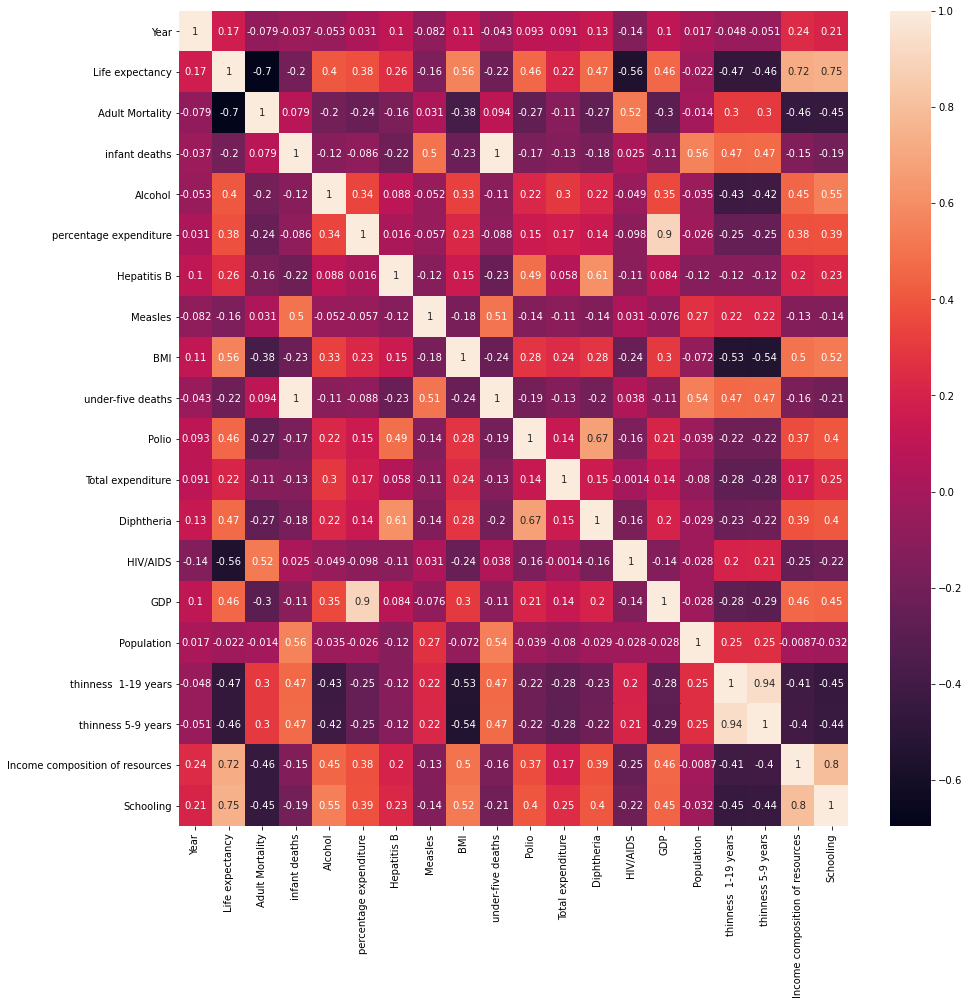

In [12]:
#correlation matrix and heatmap 
corr_data=df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_data, annot = True, ax = ax)
plt.show()

Initially, Alcohol is most correlated with schooling. Let's make scatter plot to observe the relationship.

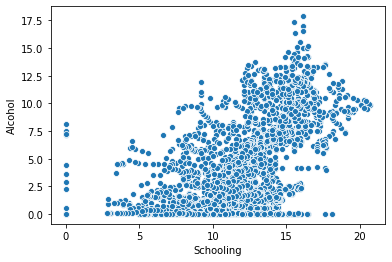

In [13]:
#scatterplot between alcohol and schooling
sns.scatterplot(x=df['Schooling'],y=df['Alcohol'])
plt.show()

Based on the scatterplot, we will fill null alcohol entries proportional to corresponding schooling value. We will group the data into 4 group of schooling: 
<ol>
    <li>under 5</li>
    <li>between 10 and 5</li>
    <li>between 10 and 15 </li>
    <li>above 15 </li>
</ol>
and find the average of alcohol in each group and fill the nulle values accordingly. However, we count the schooling values equal to <B>zero</B> as missing data because there is a gap between 0 values and the minimum value of schooling. 

In [14]:
#grouping
under_5 = df.loc[(df['Schooling'] < 5) & (df['Schooling'] != 0)]['Alcohol'].mean()
between_5_10 = df.loc[(df['Schooling'] >= 5) & (df['Schooling'] < 10)]['Alcohol'].mean()
between_10_15 =df.loc[(df['Schooling'] >= 10) & (df['Schooling'] < 15)]['Alcohol'].mean()
above_15 = df.loc[(df['Schooling'] >= 15)]['Alcohol'].mean()
print(f'under 5: {under_5}, between 10 and 5: {between_5_10}, between 10 and 15: {between_10_15}, above 15: {above_15 }')

under 5: 1.731086956521739, between 10 and 5: 2.0701272727272695, between 10 and 15: 4.084567983925003, above 15: 8.914028925619839


Now, we fill the Null values of Alcohol columns with the new averages. 

In [15]:
#fill the Null values in Alcohol Column
df.loc[(df['Schooling'] < 5) & (df['Schooling'] != 0) & (df['Alcohol'].isnull()), ['Alcohol']] = under_5
df.loc[(df['Schooling'] >= 5) & (df['Schooling'] < 10) & (df['Alcohol'].isnull()), ['Alcohol']] = between_5_10 
df.loc[(df['Schooling'] >= 10) & (df['Schooling'] < 15) & (df['Alcohol'].isnull()), ['Alcohol']] = between_10_15
df.loc[(df['Schooling'] >= 15) & (df['Alcohol'].isnull()), ['Alcohol']] = above_15

Let's see how many more Null values we have in the Alcohol column:

In [16]:
#remining Null values in Alcohol
df['Alcohol'].isnull().sum()

20

We will fill the rest with the mean value since it is less than 50.  

In [17]:
df['Alcohol']=df['Alcohol'].fillna(value=trim_mean(df['Alcohol'],0.1))

In [18]:
df['Alcohol'].isnull().sum()

0

We filled all the Null values in Alcohol Column. Yay!!!. Next step is Hepatitis B which highly correlates with Diphtheria.

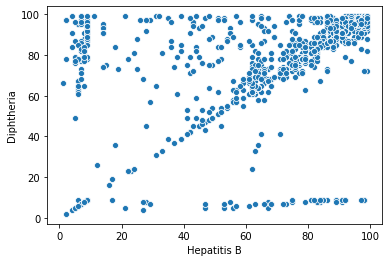

In [19]:
#scatterplot between Hepatatis B and Diptheria
sns.scatterplot(x=df['Hepatitis B'],y=df['Diphtheria'])
plt.show()

Based on the scatterplot, we will fill null Hepatitis B entries proportional to corresponding schooling value. We will group the data into 5 group of schooling: 
<ol>
    <li>under 20</li>
    <li>between 20 and 40</li>
    <li>between 40 and 60 </li>
    <li>between 60 and 80 </li>
    <li>above 80 </li>
</ol>
and find the average of Hepatitis B in each group and fill the nulle values accordingly. 

In [20]:
#grouping
under_20 = df.loc[df['Diphtheria'] < 20]['Hepatitis B'].mean()
between_20_40 = df.loc[(df['Diphtheria'] >= 20) & (df['Diphtheria'] < 40)]['Hepatitis B'].mean()
between_40_60 =df.loc[(df['Diphtheria'] >= 40) & (df['Diphtheria'] < 60)]['Hepatitis B'].mean()
between_60_80 =df.loc[(df['Diphtheria'] >= 60) & (df['Diphtheria'] < 80)]['Hepatitis B'].mean()
above_80 = df.loc[(df['Diphtheria'] >= 80)]['Hepatitis B'].mean()
print(f'under 20: {under_20}, between 20 and 40: {between_20_40}, between 40 and 60: {between_40_60}, between 60 and 80: {between_60_80}, above 80 : {above_80 }')

under 20: 36.233870967741936, between 20 and 40: 34.93333333333333, between 40 and 60: 48.35294117647059, between 60 and 80: 63.63742690058479, above 80 : 88.39503507825148


As you may notice in under 20, the Hepatitis B values are more scattered comparing to other sections. Therefore, the average is a bit higher than 20-40 range.

Now, we fill the Null values of Hepatitis B columns with the new averages.

In [21]:
#fill the Null values in Hepatitis B Column
df.loc[(df['Diphtheria'] < 20) & (df['Hepatitis B'].isnull()), ['Hepatitis B']] = under_20
df.loc[(df['Diphtheria'] >= 20) & (df['Diphtheria'] < 40) & (df['Hepatitis B'].isnull()), ['Hepatitis B']] = between_20_40 
df.loc[(df['Diphtheria'] >= 40) & (df['Diphtheria'] < 60) & (df['Hepatitis B'].isnull()), ['Hepatitis B']] = between_40_60 
df.loc[(df['Diphtheria'] >= 60) & (df['Diphtheria'] < 80) & (df['Hepatitis B'].isnull()), ['Hepatitis B']] = between_60_80
df.loc[(df['Diphtheria'] >= 80) & (df['Hepatitis B'].isnull()), ['Hepatitis B']] = above_80

Let's see how many more Null values we have in the Hepatitis B column:

In [22]:
#remining Null values in Hepatitis B
df['Hepatitis B'].isnull().sum()

0

Yay!!! all the null values are filled in the Hepatitis B column. the next column is Total expenditure. As this variable is not strongly correlated with other variables. We will fill up the values with trimmed mean value. 

In [23]:
#filling the Total expenditure column
df['Total expenditure']=df['Total expenditure'].fillna(value=trim_mean(df['Total expenditure'],0.1))

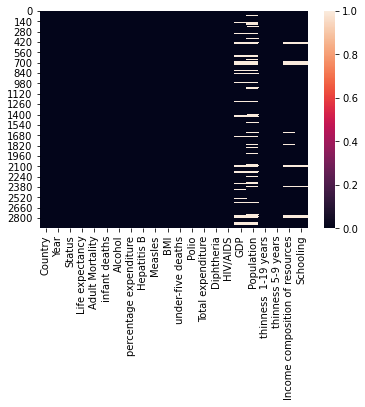

In [24]:
#plotting the remaining Null values
sns.heatmap(pd.isnull(df))
plt.show()

Only four columns remained that need to be cleaned. lets's do the same thing for the rest. We will continue with GDP column which is strongly correlated with percentage expenditure.

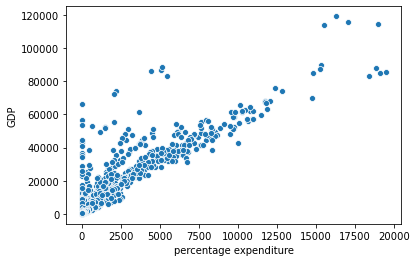

In [25]:
sns.scatterplot(x=df['percentage expenditure'],y=df['GDP']);

Since the percentage expenditure seems to be linearly correlated with GDP. we'll use a simple linear regresssion to fill up the null values.

In [26]:
#dropping the Null values to make a non-Null dataframe for training
GDPTrain = df[['percentage expenditure', 'GDP']].dropna(how = 'any')

#The X axis of dolumns with Null values
GDPTest_x = df.loc[df['GDP'].isnull(), ['percentage expenditure']]

In [27]:
#defining the model using Sklearn library
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = np.array(GDPTrain['percentage expenditure']).reshape(-1,1)
y = np.array(GDPTrain.GDP).reshape(-1,1)
reg_model = reg.fit(X, y)
reg_model.coef_

array([[6.01851823]])

In [28]:
#predicting the Null values with our reg_model
xtest = np.array(GDPTest_x).reshape(-1,1)
y_pred = reg.predict(xtest)

In [29]:
#filling up the Null values with predicted values from regression
df.loc[df['GDP'].isnull(), ['GDP']] = y_pred

In [30]:
#checking whether any null values remained in GDP
df['GDP'].isnull().sum()

0

Let's move on to the next column which is population. it seems that population is mostly correlated with infant death

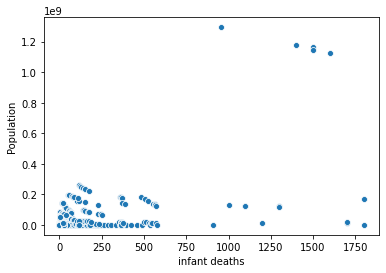

In [31]:
#scatterplot between infant deaths and Population
sns.scatterplot(x=df['infant deaths'],y=df['Population']);

The data seems very scatter and there is no clear relationship between these two variables. We also don't think filling up the populations by the mean really works here. So, we use a different method. First let's group the data by population and name of the country. 

In [32]:
#number of null values in population column
df['Population'].isnull().sum()

652

Let's quickly look at the population values of different countries and see how they change over the years. Then, we can decide a method to fill up the null values in this column. 

In [33]:
#grabbing three columns from our dataset
countries = df[['Country','Population', 'Year']]
countries.head(10)

,Country,Population,Year
0,Afghanistan,33736494.0,2015
1,Afghanistan,327582.0,2014
2,Afghanistan,31731688.0,2013
3,Afghanistan,3696958.0,2012
4,Afghanistan,2978599.0,2011
5,Afghanistan,2883167.0,2010
6,Afghanistan,284331.0,2009
7,Afghanistan,2729431.0,2008
8,Afghanistan,26616792.0,2007
9,Afghanistan,2589345.0,2006


<p>The results is showing very different values which are not correct. The population of afghanistan is around 34 million people. We decide to completely omit the column of this dataset and Let's find another dataset which contain correct information about Population of countries over years. We decided to use the <a href = "https://population.un.org/wpp/Download/Standard/CSV/"> total population </a> dataset.</p>
Source: https://population.un.org/wpp/Download/Standard/CSV/

In [34]:
#reading the new dataset
data2=pd.read_csv('WPP2019_TotalPopulationBySex.csv')
data2.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


In [35]:
#separate the most important columns from the new dataset
population = data2[['Location', 'Time', 'PopTotal']]

In [36]:
#merge the data
merged = pd.merge(countries, population, how = 'left', left_on = ['Country', 'Year'], right_on = ['Location', 'Time'])
merged.head()

,Country,Population,Year,Location,Time,PopTotal
0,Afghanistan,33736494.0,2015,Afghanistan,2015.0,34413.603
1,Afghanistan,327582.0,2014,Afghanistan,2014.0,33370.804
2,Afghanistan,31731688.0,2013,Afghanistan,2013.0,32269.592
3,Afghanistan,3696958.0,2012,Afghanistan,2012.0,31161.378
4,Afghanistan,2978599.0,2011,Afghanistan,2011.0,30117.411


The next step would be substituion of population column with the newly merged one. But let's make sure that the merge has been done right. 

In [37]:
#Checking the column dimension
merged['PopTotal'].shape == df['Population'].shape

True

Okay. let's substitute the population with the right values. 

In [38]:
# substitute the Population values
df['Population'] = merged['PopTotal']

In [39]:
#number of null values in population column
df['Population'].isnull().sum()

80

Unless we used the new datasets, we still have some null values left in the population column. This time we are not going to use the trimmed mean since it does not make sense to fill the null population of a country with the mean of population of all countries. So, we fill the null values with ‘bfill’ which use next valid observation to fill the gap.

In [40]:
#filling the population column
df['Population']=df['Population'].fillna(method ='ffill')

In [41]:
#number of null values in population column
df['Population'].isnull().sum()

0

Okay, now all the null values in population column in filled, let's move on to the next column which is Income composition of resources. This column is mostly correlated with schooling. However, schooling still needs to be cleaned. It is also correlated with life expectency column. 

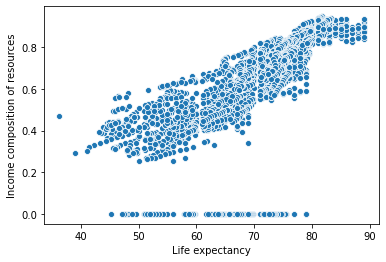

In [42]:
#scatterplot between Income composition of resources and life expectency 
sns.scatterplot(x=df['Life expectancy'],y=df['Income composition of resources']);

This one also seems to have linear relationship with each other. Let's use the same technique to fill it up. However, we are still not sure what these zero income values mean. Probably they are another type of null data.

In [43]:
#dropping the Null values to make a non-Null dataframe for training
incomeTrain = df[['Income composition of resources', 'Life expectancy']].dropna(how = 'any')

#let's drop the zero values as well
incomeTrain = incomeTrain.loc[~(incomeTrain==0).all(axis=1)]

In [44]:
#defining the model using Sklearn library
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = np.array(incomeTrain['Life expectancy']).reshape(-1,1)
y = np.array(incomeTrain['Income composition of resources']).reshape(-1,1)
reg_model = reg.fit(X, y)
reg_model.coef_

array([[0.01633621]])

In [45]:
#defining the x test which is Life expectancy column corresponding to income entries with null values
incomeTest_x = df.loc[df['Income composition of resources'].isnull(), ['Life expectancy']]

In [46]:
#predicting the Null values with our reg_model
xtest = np.array(incomeTest_x).reshape(-1,1)
y_pred = reg.predict(xtest)

#filling up the Null values with predicted values from regression
df.loc[df['Income composition of resources'].isnull(), ['Income composition of resources']] = y_pred

In [47]:
#number of null values in income column
df['Income composition of resources'].isnull().sum()

0

The only column that remained is schooling. 

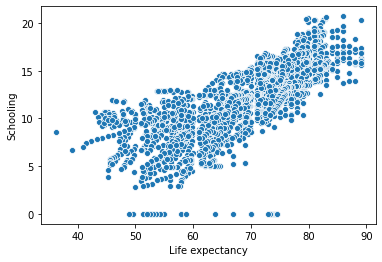

In [48]:
#scatterplot between Schooling and life expectency 
sns.scatterplot(x=df['Life expectancy'],y=df['Schooling']);

This looks good but let's see the scatterplot between Schooling and income.

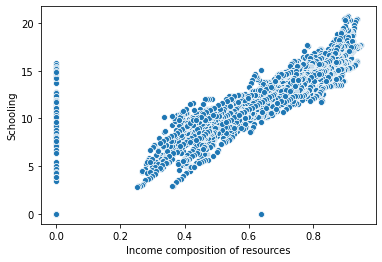

In [49]:
#scatterplot between Schooling and life expectency 
sns.scatterplot(x=df['Income composition of resources'],y=df['Schooling']);

Okay, this looks much better. let's use income column for regression. 

In [50]:
#dropping the Null values to make a non-Null dataframe for training
schoolingTrain = df[['Income composition of resources', 'Schooling']].dropna(how = 'any')

#let's drop the zero values as well
schoolingTrain = schoolingTrain.loc[~(schoolingTrain==0).all(axis=1)]

In [51]:
#defining the model using Sklearn library
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = np.array(schoolingTrain['Income composition of resources']).reshape(-1,1)
y = np.array(schoolingTrain['Schooling']).reshape(-1,1)
reg_model = reg.fit(X, y)
reg_model.coef_

array([[12.09977234]])

In [52]:
#defining the x test which is income column corresponding to schooling entries with null values
schoolingTest_x = df.loc[df['Schooling'].isnull(), ['Income composition of resources']]

In [53]:
#predicting the Null values with our reg_model
xtest = np.array(schoolingTest_x).reshape(-1,1)
y_pred = reg.predict(xtest)

#filling up the Null values with predicted values from regression
df.loc[df['Schooling'].isnull(), ['Schooling']] = y_pred

In [54]:
#number of null values in schooling column
df['Income composition of resources'].isnull().sum()

0

Let's check the heatmap again to make sure that we filled up all the null values properly. 

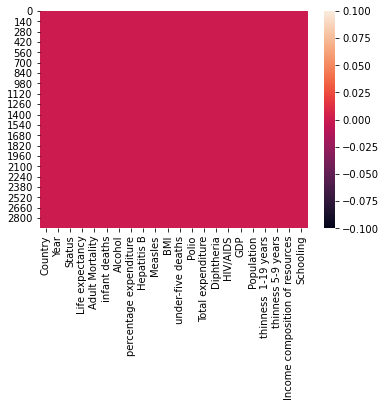

In [55]:
#plotting the remaining Null values
sns.heatmap(pd.isnull(df))
plt.show()

Yayyyy, all clear, there is no null values remained.

Next step is the <strong>Exploratory Data Analysis</strong>

### Exploratory Data Analysis

Let's see the distribution of our column variables. 

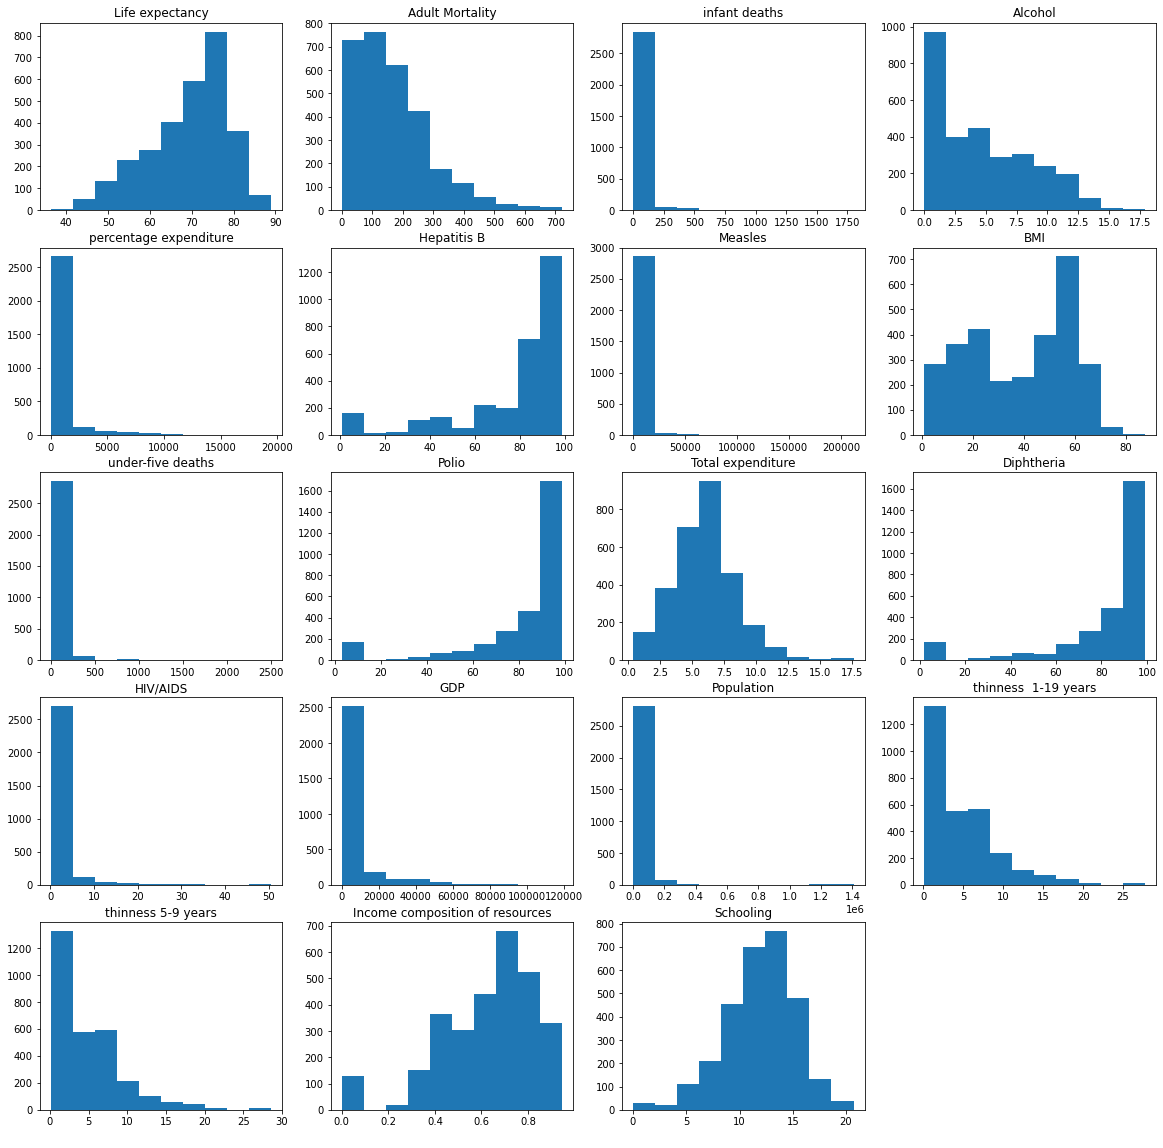

In [56]:
#histograms
numerical_columns = ['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 
                     'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 
                     'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
                     'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 
                     'Schooling']

plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    plt.hist(df[col])
    plt.title(col)
    plt.xlabel(' ')

Looking at the histrogram, we can easily see that some of the columns like Population are suffering from having outliers. In cade of population column, the outlier data is from India population which is significantly higher than other countries. Therefore, we are not going to remove outliers, instead we will try to import insight from them.

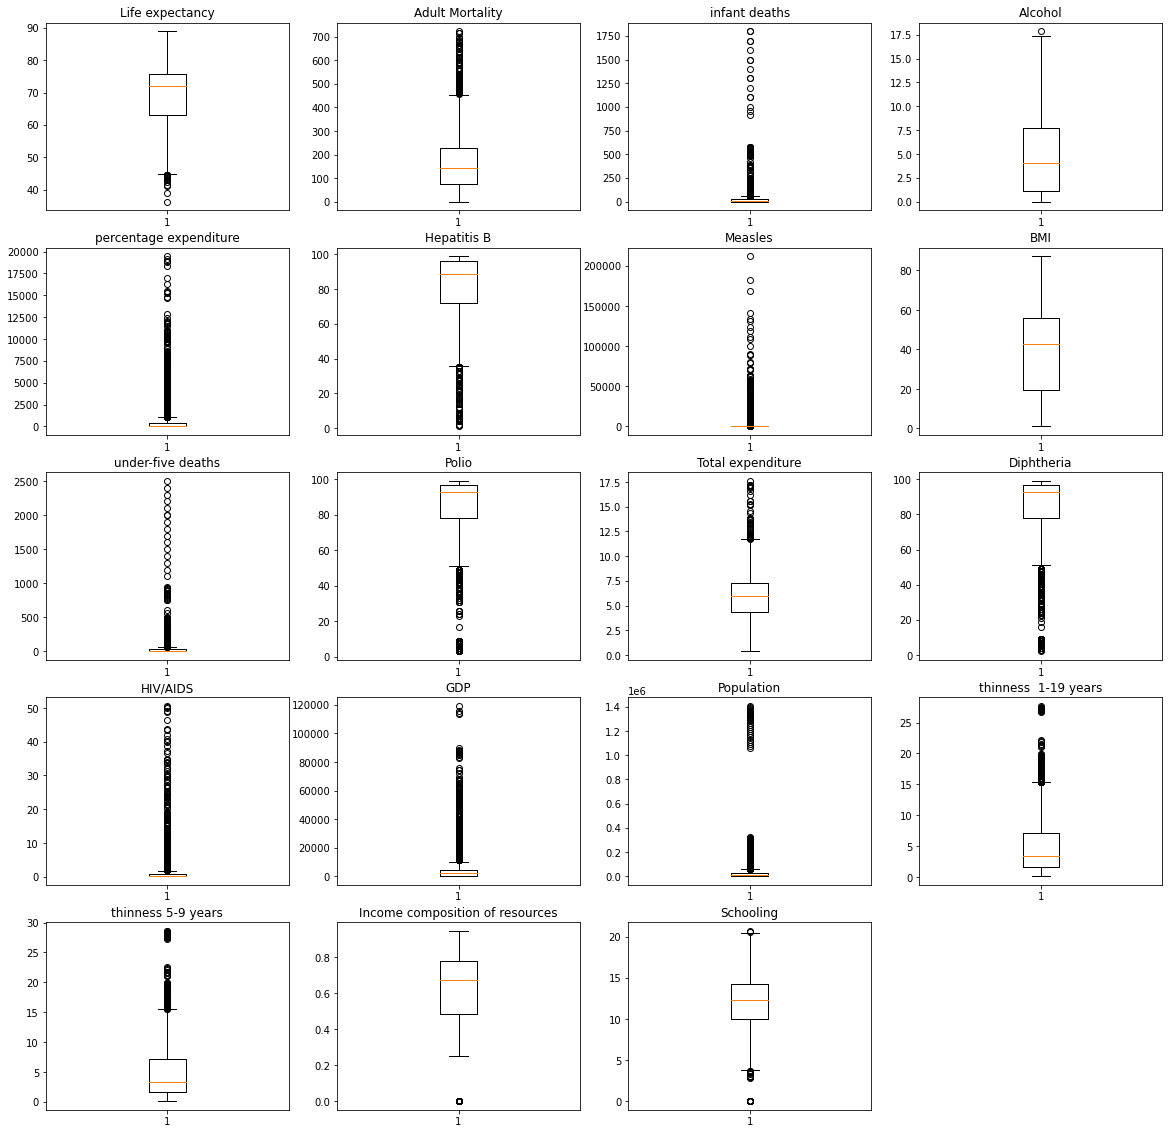

In [57]:
#boxplot to detect the outliers
numerical_columns = ['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 
                     'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 
                     'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
                     'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 
                     'Schooling']

plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    plt.boxplot(df[col])
    plt.title(col)
    plt.xlabel(' ')

Now, let's focus more on life expectency.First, we want to see which countries has the higher life expetency. 

Top 5 countries who have the highest average life expectency. 

In [58]:
# grouping the data by country - calculating the mean of life expectency - sorting the data
highest_avg_life = df.groupby('Country')['Life expectancy'].mean().sort_values(ascending = False).head(5)
lowest_avg_life = df.groupby('Country')['Life expectancy'].mean().sort_values(ascending = True).head(5)


print(highest_avg_life)
print('.........')
print(lowest_avg_life)

Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Name: Life expectancy, dtype: float64
.........
Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
Name: Life expectancy, dtype: float64


As we see <strong>Japan</strong>, <strong>Sweden</strong>, <strong>Iceland</strong>, <strong>Switzerland</strong>, and <strong>France</strong> have the highest life expectency around 82 and higher. While <strong>Sierra Leone</strong>, <strong>Central African Republic</strong>, <strong>Lesotho </strong>, <strong>Angola</strong>, and <strong>Malawi</strong> have the lowest life expectency around 49 and less. 

Let's visualize the life expectenacy data on a map:

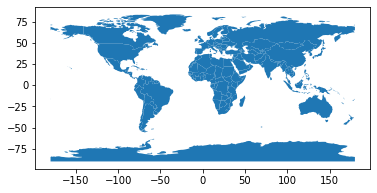

In [59]:
#importing the world file from geopandas library
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot();

In [60]:
#choosing the columns from dataset
dataCases = df[['Country', 'Life expectancy']]

In [61]:
world.head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [62]:
#how many missing values do we have?
country_list = dataCases['Country'].unique().tolist()
world_countries = world['name'].tolist()

for item in country_list:
    if item not in world_countries:
        print(item)

Antigua and Barbuda
Bahrain
Barbados
Bolivia (Plurinational State of)
Bosnia and Herzegovina
Brunei Darussalam
Cabo Verde
Central African Republic
Comoros
Cook Islands
Democratic People's Republic of Korea
Democratic Republic of the Congo
Dominica
Dominican Republic
Equatorial Guinea
Grenada
Iran (Islamic Republic of)
Kiribati
Lao People's Democratic Republic
Maldives
Malta
Marshall Islands
Mauritius
Micronesia (Federated States of)
Monaco
Nauru
Niue
Palau
Republic of Korea
Republic of Moldova
Russian Federation
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and the Grenadines
Samoa
San Marino
Sao Tome and Principe
Seychelles
Singapore
Solomon Islands
South Sudan
Swaziland
Syrian Arab Republic
The former Yugoslav republic of Macedonia
Tonga
Tuvalu
United Kingdom of Great Britain and Northern Ireland
United Republic of Tanzania
Venezuela (Bolivarian Republic of)
Viet Nam


In [63]:
#let's start the matching process as the name of countries are not the same in two dataset
world_countries

['Fiji',
 'Tanzania',
 'W. Sahara',
 'Canada',
 'United States of America',
 'Kazakhstan',
 'Uzbekistan',
 'Papua New Guinea',
 'Indonesia',
 'Argentina',
 'Chile',
 'Dem. Rep. Congo',
 'Somalia',
 'Kenya',
 'Sudan',
 'Chad',
 'Haiti',
 'Dominican Rep.',
 'Russia',
 'Bahamas',
 'Falkland Is.',
 'Norway',
 'Greenland',
 'Fr. S. Antarctic Lands',
 'Timor-Leste',
 'South Africa',
 'Lesotho',
 'Mexico',
 'Uruguay',
 'Brazil',
 'Bolivia',
 'Peru',
 'Colombia',
 'Panama',
 'Costa Rica',
 'Nicaragua',
 'Honduras',
 'El Salvador',
 'Guatemala',
 'Belize',
 'Venezuela',
 'Guyana',
 'Suriname',
 'France',
 'Ecuador',
 'Puerto Rico',
 'Jamaica',
 'Cuba',
 'Zimbabwe',
 'Botswana',
 'Namibia',
 'Senegal',
 'Mali',
 'Mauritania',
 'Benin',
 'Niger',
 'Nigeria',
 'Cameroon',
 'Togo',
 'Ghana',
 "Côte d'Ivoire",
 'Guinea',
 'Guinea-Bissau',
 'Liberia',
 'Sierra Leone',
 'Burkina Faso',
 'Central African Rep.',
 'Congo',
 'Gabon',
 'Eq. Guinea',
 'Zambia',
 'Malawi',
 'Mozambique',
 'eSwatini',
 'Angol

In [64]:
#matching the countries name
world.replace('Iran', 'Iran (Islamic Republic of)', inplace = True)
world.replace('Vietnam', 'Viet Nam', inplace = True)
world.replace('Venezuela', 'Venezuela (Bolivarian Republic of)', inplace = True)
world.replace('Tanzania', 'United Republic of Tanzania', inplace = True)
world.replace('United Kingdom', 'United Kingdom of Great Britain and Northern Ireland', inplace = True)
world.replace('Macedonia', 'The former Yugoslav republic of Macedonia', inplace = True)
world.replace('Syria', 'Syrian Arab Republic', inplace = True)
world.replace('eSwatini', 'Swaziland', inplace = True)
world.replace('S. Sudan', 'South Sudan', inplace = True)
world.replace('Solomon Is.', 'Solomon Islands', inplace = True)
world.replace('Russia', 'Russian Federation', inplace = True)
world.replace('Moldova', 'Republic of Moldova', inplace = True)
world.replace('South Korea', 'Republic of Korea', inplace = True)
world.replace('North Korea', 'Democratic People\'s Republic of Korea', inplace = True)
world.replace('Laos', 'Lao People\'s Democratic Republic', inplace = True)
world.replace('Guinea', 'Equatorial Guinea', inplace = True)
world.replace('Dominican Republic', 'Dominican Rep.', inplace = True)
world.replace('Dem. Rep. Congo', 'Democratic Republic of the Congo', inplace = True)
world.replace('Central African Rep.', 'Central African Republic', inplace = True)
world.replace('Brunei', 'Brunei Darussalam', inplace = True)
world.replace('Bosnia and Herz.', 'Bosnia and Herzegovina', inplace = True)
world.replace('Bolivia', 'Bolivia (Plurinational State of)', inplace = True)

In [65]:
#merging two dataset
combined_world = world.merge(dataCases, left_on = 'name', right_on = 'Country', how = 'left')

In [66]:
combined_world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Life expectancy
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,69.9
1,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,69.7
2,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,69.6
3,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,69.4
4,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,69.2


In [67]:
#dropping the country column as it is excessive
combined_world = combined_world.drop('Country', 1)
combined_world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Life expectancy
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",69.9
1,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",69.7
2,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",69.6
3,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",69.4
4,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",69.2


In [68]:
#just keep the latest life expectency of each country
combined_world = combined_world.drop_duplicates(subset = ['name'], keep = 'first')
combined_world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Life expectancy
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",69.9
16,53950935,Africa,United Republic of Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",61.8
32,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
33,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",82.2
49,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",79.3


In [69]:
#making a new file from our combined data
combined_world.to_file('combined_world')

In [70]:
#reading the new saved file
combined = gpd.read_file('combined_world')
combined.head()

,pop_est,continent,name,iso_a3,gdp_md_est,Life expec,geometry
0,920938,Oceania,Fiji,FJI,8374.0,69.9,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,United Republic of Tanzania,TZA,150600.0,61.8,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,NaN,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,82.2,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,79.3,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Figure size 720x720 with 0 Axes>

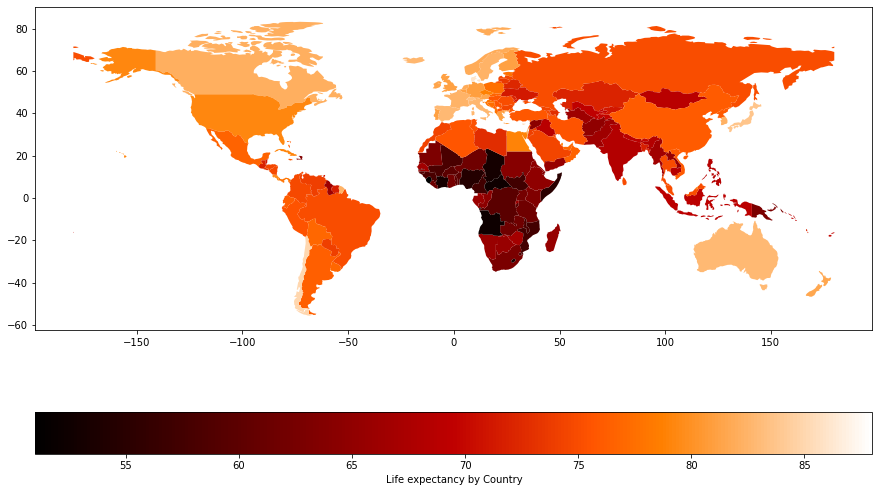

In [71]:
#ploting the Choropleth Map 
plt.figure(figsize=(10,10))
combined.plot(column = 'Life expec', figsize=(15, 10), legend=True, 
              legend_kwds={'label': "Life expectancy by Country",
                          'orientation': "horizontal"}, cmap= 'gist_heat');

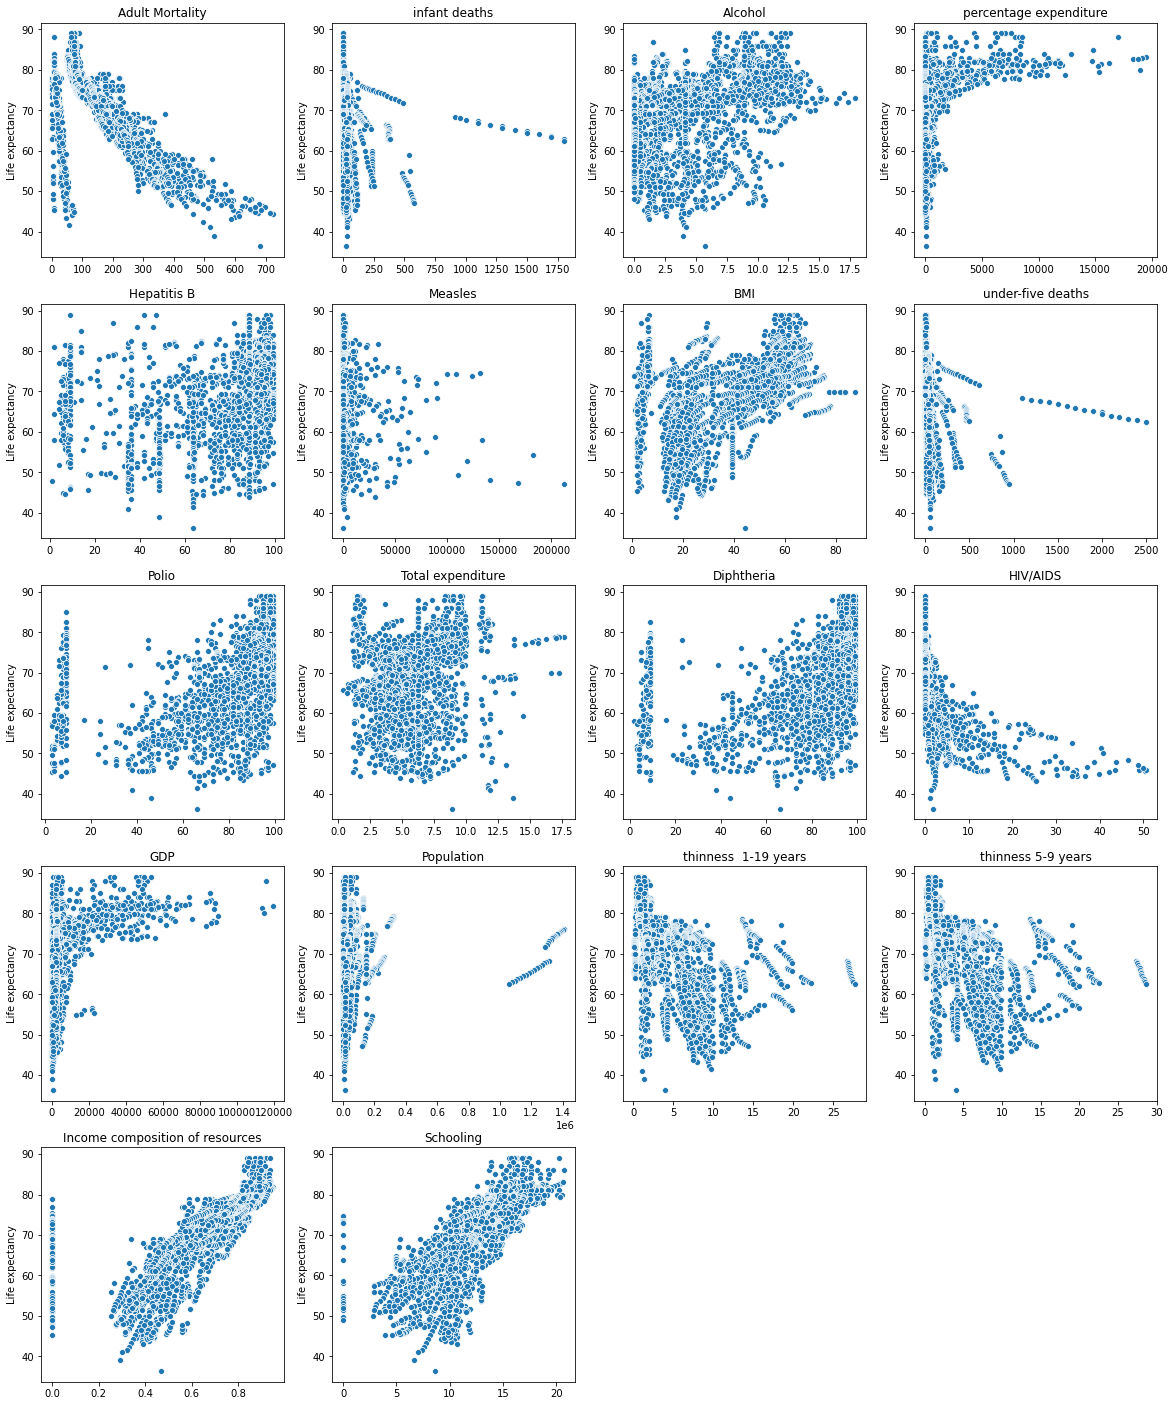

In [72]:
#scatterplot
scatter_columns = ['Adult Mortality', 'infant deaths', 'Alcohol', 
                     'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 
                     'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
                     'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 
                     'Schooling']

plt.figure(figsize=(20, 25))
for i, col in enumerate(scatter_columns, 1):
    plt.subplot(5, 4, i)
    sns.scatterplot(df[col], df['Life expectancy'], palette="YlGnBu")
    plt.title(col)
    plt.xlabel(' ')

Let's look at the difference between life expetency in developed and developing countries. 

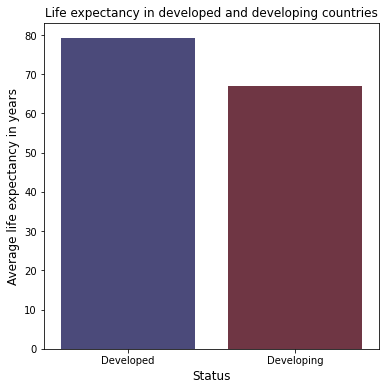

In [73]:
# Life_Expectancy vs Status using bar plot.
plt.figure(figsize=(6,6))
x = df.groupby('Status')['Status'].count().index #developed and developing
y = df.groupby('Status')['Life expectancy'].mean()
sns.barplot(x,y, palette="icefire")
plt.xlabel("Status",fontsize=12)
plt.ylabel("Average life expectancy in years",fontsize=12)
plt.title("Life expectancy in developed and developing countries")
plt.show()

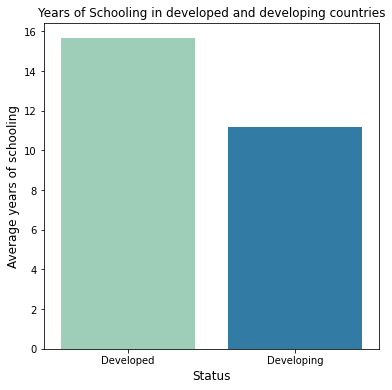

In [74]:
# Schooling vs Status using bar plot.
plt.figure(figsize=(6,6))
x = df.groupby('Status')['Status'].count().index #developed and developing
y = df.groupby('Status')['Schooling'].mean()
sns.barplot(x,y, palette="YlGnBu")
plt.xlabel("Status",fontsize=12)
plt.ylabel("Average years of schooling",fontsize=12)
plt.title("Years of Schooling in developed and developing countries")
plt.show()

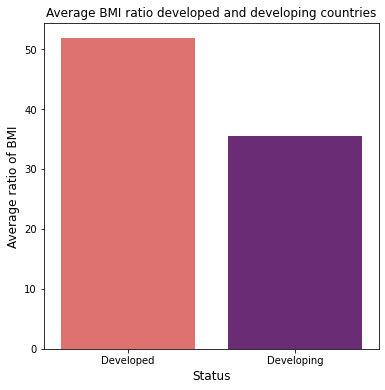

In [75]:
# BMI vs Status using bar plot.
plt.figure(figsize=(6,6))
x = df.groupby('Status')['Status'].count().index #developed and developing
y = df.groupby('Status')['BMI'].mean()
sns.barplot(x,y, palette="magma_r")
plt.xlabel("Status",fontsize=12)
plt.ylabel("Average ratio of BMI",fontsize=12)
plt.title("Average BMI ratio developed and developing countries")
plt.show()

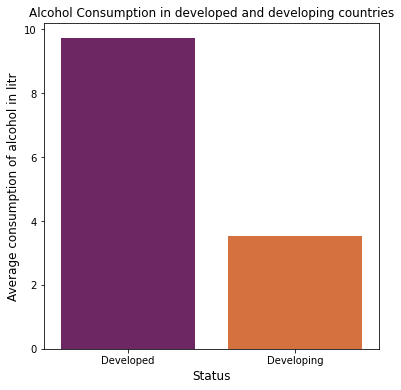

In [76]:
# Alcohol vs Status using bar plot.
plt.figure(figsize=(6,6))
x = df.groupby('Status')['Status'].count().index #developed and developing
y = df.groupby('Status')['Alcohol'].mean()
sns.barplot(x,y, palette="inferno")
plt.xlabel("Status",fontsize=12)
plt.ylabel("Average consumption of alcohol in litr",fontsize=12)
plt.title("Alcohol Consumption in developed and developing countries")
plt.show()

It is wierd but it seems as the consumption of alcohol goes higher, the life expectency increases!Let's look at the relationship between adult mortality and alcohol consumption to get a better understanding. 

In [77]:
#alcohol vs adult mortality
#sns.scatterplot(df['Alcohol'], df['Adult Mortality'], palette="magma_r")
#plt.title('Alcohol vs Adult Mortality'

I don't see any obvious correlation between adult motality and alcohol. Let's dig deeper. 

Text(0.5, 1.0, 'Alcohol vs BMI')

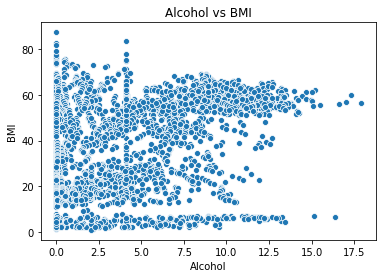

In [78]:
#alcohol vs BMI
sns.scatterplot(df['Alcohol'], df['BMI'], palette="magma_r")
plt.title('Alcohol vs BMI')

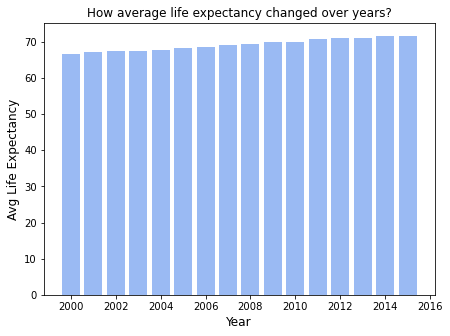

In [79]:
# Life_Expectancy in different Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(df.groupby('Year')['Year'].count().index,df.groupby('Year')['Life expectancy'].mean(),color='cornflowerblue',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life Expectancy",fontsize=12)
plt.title("How average life expectancy changed over years?")
plt.show()

### Modeling

To do the modeling, we need a X, and y variable. The target (y) value is life expectency. The predictor values X would be the rest of the columns. 

In [80]:
#defining X and y values
y = df['Life expectancy']
X = X=df.drop('Life expectancy',axis=1)

The categorical data columns (e.g. country, status of development) need to be converted to numerical. To dod this, we use dummy variables.

In [81]:
#unique values of countries
X['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [82]:
#number of unique values
X['Country'].nunique()

193

In [83]:
#unique values of countries
X['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [84]:
#number of unique values
X['Status'].nunique()

2

Now, let's create the dummy variables. 

In [85]:
Country_dummy=pd.get_dummies(X['Country'])
# Dummy variables for Country feature.

status_dummy=pd.get_dummies(X['Status'])
# Dummy variables for status feature.

In [86]:
#replacing the variables with dummy variables
X.drop(['Country','Status'],inplace=True,axis=1)
X=pd.concat([X,Country_dummy,status_dummy],axis=1)

Let's split the data into train and test values

In [87]:
#test and train split with scikit learn 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

Finally, it is time to solve the problem with regression. 

In [88]:
#building the linear regression model with sklearn libraries
from sklearn.linear_model import LinearRegression
Linear_model= LinearRegression()
Linear_model.fit(X_train,y_train)

LinearRegression()

In [89]:
# calculating the prediction
y_pred=Linear_model.predict(X_test)

Now, let's use some metrics to evaluate our model. For regression,we will use R2 and RMSE.

In [90]:
#calculating the r2
from sklearn.metrics import r2_score

r2_score(y_pred, y_test)

0.9580457587758154

In [91]:
#calculating the RMSE
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_test)

3.556196780237348

Okay, now let's see is there any way to improve our model. Before that, let's compare sklearn result to statmodel and get a full description of our model. 

In [92]:
import statsmodels.api as sm

#adding a constant column of 1 to our X to act as intercept
X_sm = sm.add_constant(X)

#model
model = sm.OLS(y, X_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     349.2
Date:                Sun, 27 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:12:48   Log-Likelihood:                -5888.3
No. Observations:                2938   AIC:                         1.220e+04
Df Residuals:                    2726   BIC:                         1.347e+04
Df Model:                         211                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Looking at R-quared and Adj. R-squared, seems that our model is doing very good. (R-squared: 0.964), (Adj. R-squared:0.962)
The model converted each of dummy variables to a independent variables and showed the p-value. Here, any p-value less than 0.05 means that it is significant to our model. There are some values such BMI and Diphtheria have relatively high p-values which means they are not significant to our mdoel. Although the number of variables increased due to having dummy variables, the number of variables is still very less than number of observations. Therefore, using Ridge Regression for regularization would not be very useful. However, probably using lasso regression or elastic net regression would give us even better result. However our current result is very good in its current shape. 

In [93]:
#lasso regression with cross validation
from sklearn.linear_model import Lasso

#buidling the lasso model
lasso_model = Lasso(alpha = 1, max_iter=5000)
lasso_model.fit(X_train,y_train)

#score of the model
lasso_model.score(X_train,y_train)

0.8216996948767592

### Conclusion

By looking at the lasso results, although the the score is relatively good with alpha = 1. But when the alpha = 0, we get the best results. This means, we don't need lasso regerssion. we are good with linear regression.

<strong> Thank you </strong>